# 리뷰 워드클라우드 그리기 

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import konlpy as kp 

In [3]:
# 파일 불러오기 

word = pd.read_csv('중복제거.csv',encoding='cp949') 
# word.loc[]
 
work_order_list = word['중분류항목명'].value_counts().index.tolist()

cond1   = word['중분류항목명'].isin(work_order_list[:3])
df1_top = word.loc[cond1] 



In [4]:
# 시리즈 -> 형태소 분석


def pos_dataframe(data):
    okt = kp.tag.Okt()
    df_POS = pd.DataFrame()
    for i in range(0, len(data)):
        dfn = pd.DataFrame( okt.pos(data.values.tolist()[i]) )
        df_POS = pd.concat([df_POS, dfn])
    return df_POS.rename(columns={0:'형태소',1:'품사'})


In [5]:
#명사 장점 추출 
df_Pos = pos_dataframe(df1_top['기업장점설명'])
cond1 = (df_Pos['품사']=='Noun')
pd.options.display.max_rows =300
pd.options.display.max_columns = 300
df_N  = df_Pos.loc[cond1]
df_N['형태소'].value_counts().head(100)

# df_N.to_csv('명사.csv',encoding = 'cp949')

수       283
회사      245
연차      239
분위기     228
업무      183
일       167
사람      151
사용      140
눈치      139
직원      132
야근      121
장점      101
가능      101
지원       93
제공       90
복지       77
경험       76
시간       75
것        70
퇴근       69
근무       68
자유       65
함        64
수평       62
프로젝트     58
등        58
월급       57
안보       57
식대       55
대표       55
비        52
출퇴근      50
기업       50
및        50
개발       50
편        49
팀        47
자기       46
회식       46
곳        46
환경       45
점심       44
거의       43
개인       42
생각       42
칼퇴       40
때        40
내        39
연봉       38
때문       37
휴가       37
편이       36
문화       36
사무실      36
대한       36
비교       34
워        34
사장       34
줌        32
점        32
일만       31
매우       31
분        29
노력       29
신입       29
가족       29
시        29
터치       28
정도       28
나름       28
본인       28
로움       27
자율       27
간식       26
모두       26
임        25
볼        25
출근       25
대부분      25
기술       24
명절       24
경우       24
강요       24
기회  

In [70]:
#명사 처리 (엑셀수작업 ㅠ ) 
제거 = pd.read_csv('명사.csv',encoding='cp949')

제거.dropna(subset='제거3',inplace=True)

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

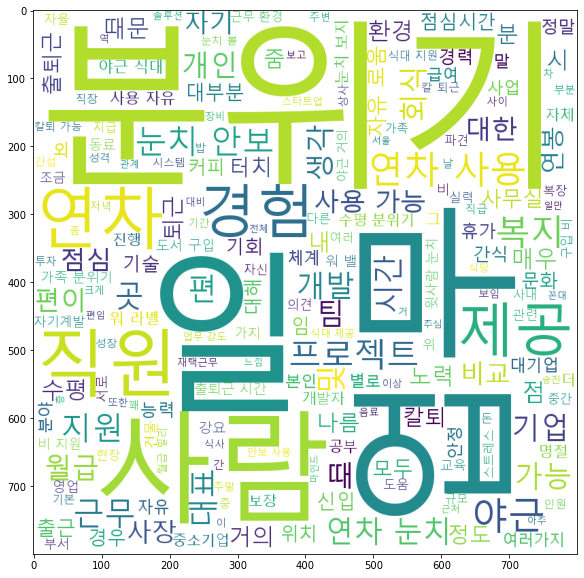

<Figure size 432x288 with 0 Axes>

In [71]:
wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(제거['제거3']))
plt.figure(figsize=[10,10])
plt.imshow(wc_img)
plt.show()
plt.savefig('img_wc.png')

In [86]:
# 형용사 장점 추출해보기 


df_Pos = pos_dataframe(df1_top['기업장점설명'])
cond1 = (df_Pos['품사']=='Adjective')
pd.options.display.max_rows =300
pd.options.display.max_columns = 300
df_N  = df_Pos.loc[cond1]
print(df_N['형태소'].value_counts().head(100))


df_N.to_csv('형용사장점.csv',encoding = 'cp949')

있음        200
없음        108
좋음        103
자유로운       95
있다         87
있는         79
좋은         77
자유롭게       65
다양한        63
있고         53
없다         40
입니다        38
있어서        34
같은         29
있어         29
있습니다       26
좋다         26
많음         25
좋고         25
편하게        25
많은         24
없는         24
없고         23
좋습니다       23
딱히         21
높은         20
있으며        20
젊은         19
나쁘지        18
없습니다       16
없어서        16
가능하다       15
많지         13
작은         13
가능합니다      13
있다는        13
있으면        13
편한         12
같음         12
많아서        12
있다면        12
편함         12
많아         12
많다         11
있지만        11
괜찮은        10
높음         10
좋았습니다      10
가능함        10
자유롭다        9
가능하고        9
다양하게        9
아닌          9
아니라         9
필요한         8
굉장히         8
가까          8
좋았음         8
새로운         8
낮은          7
편하고         7
없었음         7
착함          7
있           7
많고          7
없어          6
없으면         6
좋아요         6
조용한         6
착한          6
같다          6
다르지만  

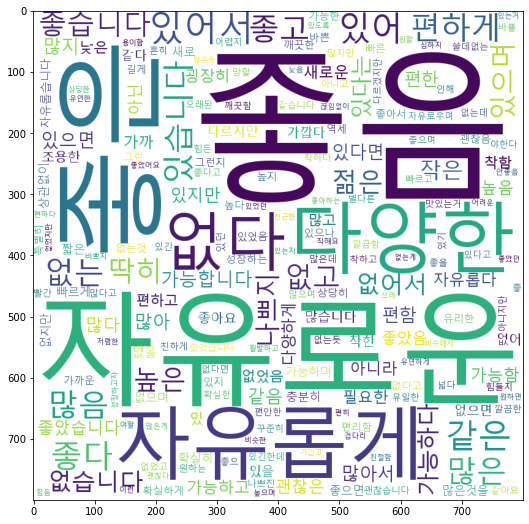

<Figure size 432x288 with 0 Axes>

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
#엑셀 수작업 후 파일 불러와서 워드클라우드 그리기 

형용사 = pd.read_csv('형용사.csv',encoding='cp949')

형용사.dropna(subset='제거3',inplace=True)
wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(형용사['제거3']))
plt.figure(figsize=[9,9])
plt.imshow(wc_img)
plt.show()
plt.savefig('형용사장점.jpg')

In [91]:
# 형용사 단점 불러오기 




df_Pos = pos_dataframe(df1_top['기업단점설명'])
cond1 = (df_Pos['품사']=='Adjective')
pd.options.display.max_rows =300
pd.options.display.max_columns = 300
df_N  = df_Pos.loc[cond1]
print(df_N['형태소'].value_counts().head(100))


# df_N.to_csv('형용사단점.csv',encoding = 'cp949')

없음       172
있음       113
많음        70
없는        55
없고        54
있는        47
있다        44
많고        44
없다        44
많은        43
있습니다      29
많아        29
작은        26
많다        26
같은        24
없어        24
있어        22
없습니다      21
힘듬        20
없어서       20
좋은        19
아닌        19
딱히        19
낮은        18
야함        18
있고        18
있지만       17
같음        17
낮음        16
입니다       16
있어서       16
인해        15
안됨        15
굉장히       14
많아서       14
많습니다      14
같다        14
심함        13
있으나       13
있을        13
힘들다       12
많지        11
높지        10
부족합니다     10
있는데       10
없으며       10
같습니다      10
없다고       10
힘듦         9
상당히        9
부족한        9
작음         9
높은         8
있으며        8
좋지         8
아님         7
다양한        7
어떻게        7
안되는        7
불필요한       7
많으며        7
젊은         7
있는지        7
바쁜         6
인한         6
그런지        6
그런         6
있었음        6
어렵다        6
좋으나        6
없어요        6
없으면        6
많으나        6
없          6
낮고         6
있지         6
당연히        6

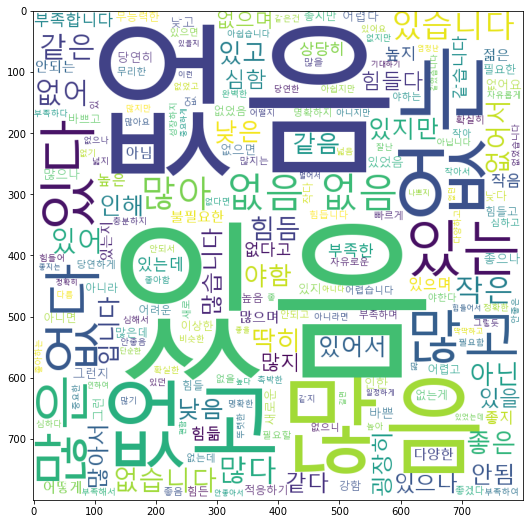

<Figure size 432x288 with 0 Axes>

In [92]:
#엑셀 수작업 후 파일 불러와서 워드클라우드 그리기 (단어 정리)

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
제거 = pd.read_csv('형용사단점.csv',encoding='cp949')

제거.dropna(subset='제거',inplace=True)
wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(제거['제거']))
plt.figure(figsize=[9,9])
plt.imshow(wc_img)
plt.show()
plt.savefig('img_wc.png')

In [80]:
# 동사 장점 
df_Pos = pos_dataframe(df1_top['기업장점설명'])
cond1 = (df_Pos['품사']=='Verb')
pd.options.display.max_rows =300
pd.options.display.max_columns = 300
df_N  = df_Pos.loc[cond1]
print(df_N['형태소'].value_counts().head(100))


df_N.to_csv('동사장점.csv',encoding = 'cp949')



할       157
하는       98
잘        90
하면       66
쓸        43
않고       36
배울       34
않음       33
됨        33
해서       30
큰        26
하기       26
하고       26
합니다      25
할수       25
하지       21
해줌       20
해        19
따라       18
한다       18
되어       18
보니       16
챙겨       15
비해       15
배울수      15
않는다      15
쓸수       14
들        14
하면서      13
해야       13
않은       13
받을       13
된        12
해볼       12
쌓을       12
됩니다      12
된다       12
않습니다     12
하게       12
되는       11
하며       11
준다       11
않는       10
하여       10
나옴       10
적은        9
않다        9
한다면       8
하는데       8
하다        8
해준다       8
않아        7
해주고       7
씀         7
줍니다       7
나온다       7
하려고       7
주고        6
쓸수있음      6
빼고는       6
쉼         6
적음        6
잇음        6
따른        6
되고        6
밀림        6
해주는       6
다니기       6
해도        5
보면        5
따         5
나오고       5
서는        5
되지        5
하는게       5
봐         5
쌓을수       5
주어진       5
해볼수       5
빼고        5
모르겠다      5
알아서       5
해줄        5
되며  

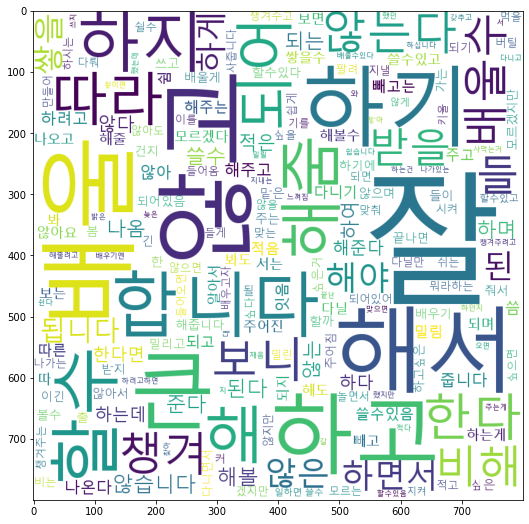

<Figure size 432x288 with 0 Axes>

In [83]:
#엑셀 수작업 후 파일 불러와서 워드클라우드 그리기 

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
제거 = pd.read_csv('동사장점.csv',encoding='cp949')
제거.dropna(subset = '제거3',inplace=True)

wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(제거['제거3']))
plt.figure(figsize=[9,9])
plt.imshow(wc_img)
plt.show()
plt.savefig('img_wc.png')

In [84]:
# 동사 단점 
df_Pos = pos_dataframe(df1_top['기업단점설명'])
cond1 = (df_Pos['품사']=='Verb')
pd.options.display.max_rows =300
pd.options.display.max_columns = 300
df_N  = df_Pos.loc[cond1]
print(df_N['형태소'].value_counts().head(100))


df_N.to_csv('동사단점.csv',encoding = 'cp949')

하는       154
할         90
않음        71
하면        55
해야        55
보니        51
잘         41
하지        38
비해        35
됨         34
한다        34
적은        33
해서        31
되는        31
적음        30
하고        30
하기        29
큰         28
따라        27
않고        26
되지        26
않은        24
하는데       24
않아        22
하다        19
될         19
않는        19
합니다       18
되어        17
하게        17
된         17
해         15
보면        15
한         14
된다        13
알아서       12
하여        12
잦음        12
잦은        12
함         11
않습니다      11
따른        10
하며        10
받음        10
해도        10
않다        10
늦게         9
가진         9
들          9
모르겠음       9
적다         8
하면서        8
쉽게         8
적어         8
받는         8
않는다        8
나옴         8
배울         8
씀          8
한다고        8
하는게        7
해주는        7
주는         7
되고         7
모르는        7
받을         7
않으면        7
않          7
가          7
하기가        7
쉽지         7
아는         6
본          6
시키는        6
봐          6
됩니다        6
줌          6

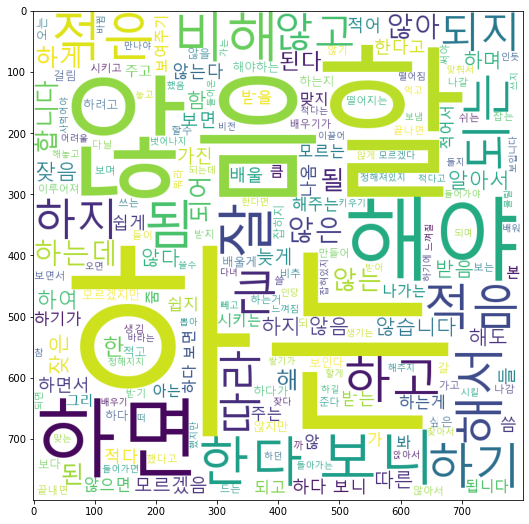

<Figure size 432x288 with 0 Axes>

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
제거 = pd.read_csv('동사단점.csv',encoding='cp949')
제거.dropna(subset = '제거',inplace=True)

wc_img = WordCloud(background_color='white', width=800, height=800,
                  font_path='Malgun.ttf').generate(' '.join(제거['제거']))
plt.figure(figsize=[9,9])
plt.imshow(wc_img)
plt.show()
plt.savefig('img_wc.png')